In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [12]:
sns.set(style="whitegrid")
df = pd.read_csv("options_KR.csv", parse_dates=["Date"], index_col="Date")
df["For_KOSPI_Netbuying_Amount"] = df["For_KOSPI_Netbuying_Amount"].apply(
    lambda x: int(float(x))
)
predictors = df.columns[1:].tolist()
df = pd.get_dummies(df, columns=["Day_of_a_week"])
predictors = df.columns[1:].tolist()

RMSE = lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true=y_true, y_pred=y_pred))


def split_time_dataset(X, y, train_ratio):
    assert X.shape[0] == len(y)

    n = X.shape[0]
    index = round(n * train_ratio)

    X_train, X_test = X.iloc[:index,], X.iloc[index:,]
    y_train, y_test = y[:index], y[index:]

    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = split_time_dataset(df[predictors], df["VKOSPI"], 0.8)
RMSE = lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true=y_true, y_pred=y_pred))

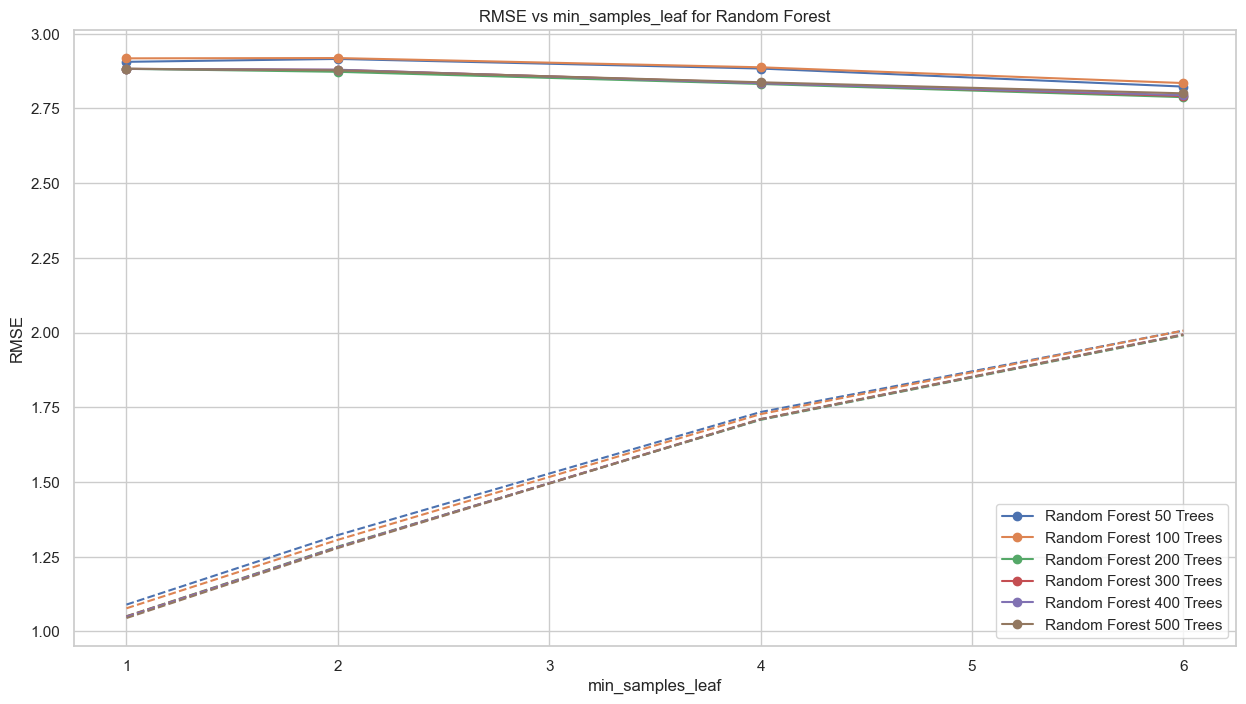

In [14]:
# Tester différents learning rate et paramètres d'arbre de décision 
performances = []
n_estimators_options = [50, 100, 200, 300, 400, 500]
min_samples_leaf_options = np.linspace(1, 6, 4, dtype=int)

for n_estimators in n_estimators_options:
    performance = {
        "Trees": n_estimators,
        "performances_train": [],
        "performances_test": [],
    }
    for min_samples_leaf in min_samples_leaf_options:
        model = RandomForestRegressor(
            min_samples_leaf=min_samples_leaf,
            n_estimators=n_estimators,
            random_state=42,
        )
        model.fit(X_train, y_train)

        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        performance["performances_train"].append(RMSE(y_train, y_pred_train))
        performance["performances_test"].append(RMSE(y_test, y_pred_test))

    performances.append(performance)

# Visualisation de la relation entre le learning rate et le RMSE  
plt.figure(figsize=(15, 8))

for index, performance in enumerate(performances):
    color = sns.color_palette()[index]
    plt.plot(
        min_samples_leaf_options,
        performance["performances_test"],
        "o-",
        label=f"Random Forest {performance['Trees']} Trees",
        color=color,
    )
    plt.plot(
        min_samples_leaf_options, performance["performances_train"], "--", color=color
    )

plt.xlabel("min_samples_leaf")
plt.ylabel("RMSE")
plt.title("RMSE vs min_samples_leaf for Random Forest")
plt.legend()
plt.show()

## Best params

n_estimators_options = 500
min_samples_leaf = 1
